In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import library 
import numpy as np
import pandas as pd
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import datasets
from nltk.stem import WordNetLemmatizer
import ipykernel
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix,classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import string
import re
import json

In [3]:
#load data set
data  = pd.read_csv("/content/drive/MyDrive/Music.csv",encoding= 'unicode_escape')
data.head()

,Lyrics,Class
0,I'll never know why I had to go\nWhy I had to ...,Energetic
1,"You're so hot, teasing me\nSo, you're blue, bu...",Happy
2,Twinkle twinkle little star\nHow I wonder what...,Sad
3,Early this morning I drove in the rain\nOut to...,Happy
4,I was a fighter always looking for trouble\nAn...,Happy


# Preprocessing

In [4]:
# remove punctuation like (*&^%)*#$
string.punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

In [5]:
data['Lyrics']= data['Lyrics'].apply(lambda x:remove_punctuation(x))
data.head()

,Lyrics,Class
0,Ill never know why I had to go\nWhy I had to p...,Energetic
1,Youre so hot teasing me\nSo youre blue but I c...,Happy
2,Twinkle twinkle little star\nHow I wonder what...,Sad
3,Early this morning I drove in the rain\nOut to...,Happy
4,I was a fighter always looking for trouble\nAn...,Happy


In [6]:
#remove new line 
def replace_new_line(text):
    return re.sub(r'(\n)', ' ', text)

In [7]:
data['Lyrics']= data['Lyrics'].apply(lambda x:replace_new_line(x))
data.head()

,Lyrics,Class
0,Ill never know why I had to go Why I had to pu...,Energetic
1,Youre so hot teasing me So youre blue but I ca...,Happy
2,Twinkle twinkle little star How I wonder what ...,Sad
3,Early this morning I drove in the rain Out to ...,Happy
4,I was a fighter always looking for trouble And...,Happy


In [8]:
# convert all lower case
data['Lyrics']=data['Lyrics'].apply(lambda x:x.lower())

In [9]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [10]:
#tokenize data
data['Lyrics']= data['Lyrics'].apply(lambda x: nltk.word_tokenize(x)) 

In [16]:
#load enlish library
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [17]:
#remove stop word
def remove_stopWord(text):
    output=[i for i in text if i not in stopwords]
    return output

In [18]:
data['Lyrics']=data['Lyrics'].apply(lambda x: remove_stopWord(x))
data

,Lyrics,Class
0,"[ill, never, know, go, put, lousy, rotten, sho...",Energetic
1,"[youre, hot, teasing, youre, blue, cant, take,...",Happy
2,"[twinkle, twinkle, little, star, wonder, like,...",Sad
3,"[early, morning, drove, rain, airport, get, pl...",Happy
4,"[fighter, always, looking, trouble, life, empt...",Happy
...,...,...
4739,"[something, folks, hope, enjoy, enter, social,...",Nature
4740,"[look, needing, know, im, friend, without, gre...",Nature
4741,"[messin, mother, natures, ovaries, cruel, wint...",Nature
4742,"[unthinkable, water, color, tea, thats, still,...",Nature


In [19]:
data.Class.value_counts()

Relax        999
Energetic    978
Sad          957
Nature       923
Happy        887
Name: Class, dtype: int64

In [20]:
#lemmatize the sentence
wordnet= WordNetLemmatizer()
def lemmatizer(text):
    lemm_text = [wordnet.lemmatize(word) for word in text]
    return lemm_text

In [21]:
data['Lyrics']=data['Lyrics'].apply(lambda x: lemmatizer(x))
data

,Lyrics,Class
0,"[ill, never, know, go, put, lousy, rotten, sho...",Energetic
1,"[youre, hot, teasing, youre, blue, cant, take,...",Happy
2,"[twinkle, twinkle, little, star, wonder, like,...",Sad
3,"[early, morning, drove, rain, airport, get, pl...",Happy
4,"[fighter, always, looking, trouble, life, empt...",Happy
...,...,...
4739,"[something, folk, hope, enjoy, enter, social, ...",Nature
4740,"[look, needing, know, im, friend, without, gre...",Nature
4741,"[messin, mother, nature, ovary, cruel, winter,...",Nature
4742,"[unthinkable, water, color, tea, thats, still,...",Nature


In [22]:
data['Lyrics'] = data.Lyrics.apply(lambda x: ' '.join(x))

# visualization

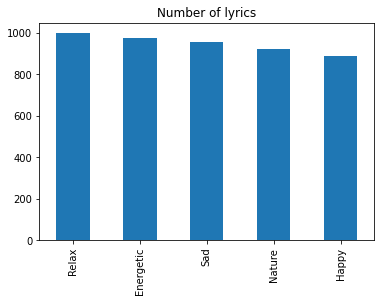

In [25]:
# show plot class value
data['Class'].value_counts().sort_values(ascending=False).plot(kind='bar', 
                                                                title='Number of lyrics')

# train test split

In [26]:
#train test split data
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(data['Lyrics'],data['Class'],test_size=0.10,random_state=202)

In [27]:
# Encoding class data 
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y.astype(str))
Test_Y = Encoder.fit_transform(Test_Y.astype(str))

In [28]:
# tfidf vactize the data 
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['Lyrics'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X.astype(str))
Test_X_Tfidf = Tfidf_vect.transform(Test_X.astype(str))

In [29]:
print(Tfidf_vect.vocabulary_)

{'ill': 2146, 'never': 2884, 'know': 2371, 'go': 1842, 'put': 3328, 'rotten': 3577, 'show': 3871, 'boy': 543, 'tough': 4508, 'packing': 3038, 'stuff': 4211, 'saying': 3674, 'dont': 1253, 'need': 2868, 'anymore': 193, 'ive': 2221, 'enough': 1426, 'look': 2556, 'standing': 4118, 'cause': 725, 'found': 1714, 'life': 2485, 'got': 1858, 'ta': 4322, 'near': 2861, 'good': 1854, 'new': 2887, 'love': 2582, 'keeping': 2326, 'way': 4765, 'intention': 2194, 'growing': 1907, 'yes': 4971, 'think': 4419, 'taking': 4331, 'dimension': 1199, 'like': 2496, 'used': 4664, 'even': 1452, 'better': 422, 'thank': 4397, 'god': 1844, 'true': 4561, 'darling': 1092, 'always': 156, 'meant': 2689, 'stay': 4135, 'together': 4479, 'feel': 1572, 'creep': 1014, 'felt': 1580, 'cheap': 772, 'notion': 2927, 'could': 970, 'deep': 1131, 'make': 2629, 'dumb': 1325, 'mistake': 2765, 'im': 2149, 'another': 185, 'break': 556, 'please': 3202, 'baby': 299, 'beg': 379, 'forgive': 1698, 'get': 1806, 'thought': 4431, 'end': 1407, 'yo

In [30]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred,average='micro')
    rec = metrics.recall_score(y_test, y_pred,average='micro')
    f1 = metrics.f1_score(y_test, y_pred,average='micro')
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr,thresholds= metrics.roc_curve(y_test, y_pred_proba,pos_label=1)
    #auc = metrics.roc_auc_score(y_test, y_pred_proba,multi_class='ovr')

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'cm': cm}

# Naive Bayes

In [31]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
score_nb_t=Naive.score(Train_X_Tfidf,Train_Y)*100
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Test Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)
score_nb=accuracy_score(predictions_NB, Test_Y)*100
print("Naive Training Accuracy Score -> ",score_nb_t)

Naive Bayes Test Accuracy Score ->  69.05263157894737
Naive Training Accuracy Score ->  84.84422581400797


In [32]:
Naive_eval = evaluate_model(Naive, Test_X_Tfidf, Test_Y)

# Print result
print('Accuracy:', Naive_eval['acc'])
print('Precision:', Naive_eval['prec'])
print('Recall:', Naive_eval['rec'])
print('F1 Score:', Naive_eval['f1'])
print('Cohens Kappa Score:', Naive_eval['kappa'])
#print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', Naive_eval['cm'])

Accuracy: 0.6905263157894737
Precision: 0.6905263157894737
Recall: 0.6905263157894737
F1 Score: 0.6905263157894737
Cohens Kappa Score: 0.6147267360057385
Confusion Matrix:
 [[59  5  3 20 26]
 [ 6 64  2 11 10]
 [ 6  1 77  5 12]
 [ 2  1  2 66 15]
 [ 8  3  5  4 62]]


# KNeighborsClassifier

In [33]:
# Classifier - Algorithm - KNN
# fit the training dataset on the classifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(Train_X_Tfidf,Train_Y)
score_knn_t=knn.score(Train_X_Tfidf,Train_Y)*100
# predict the labels on validation dataset
predictions_knn = knn.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("knn Testing Accuracy Score -> ",accuracy_score(predictions_knn, Test_Y)*100)
score_knn=accuracy_score(predictions_knn, Test_Y)*100
print("knn Training Accuracy Score -> ",score_knn_t)

knn Testing Accuracy Score ->  84.63157894736842
knn Training Accuracy Score ->  99.90630124150856


In [34]:
knn_eval = evaluate_model(knn, Test_X_Tfidf, Test_Y)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
#print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

Accuracy: 0.8463157894736842
Precision: 0.8463157894736842
Recall: 0.8463157894736842
F1 Score: 0.8463157894736841
Cohens Kappa Score: 0.8056355870449883
Confusion Matrix:
 [[109   1   2   0   1]
 [ 21  69   0   1   2]
 [  7   0  93   0   1]
 [  1   0   0  85   0]
 [ 34   2   0   0  46]]


# SVM

In [35]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=2, kernel='linear', degree=3, gamma='auto',probability=True)
SVM.fit(Train_X_Tfidf,Train_Y)
score_svm_t=SVM.score(Train_X_Tfidf,Train_Y)*100
#predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
#Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM,Test_Y)*100)
score_svm=accuracy_score(predictions_SVM,Test_Y)*100
print("SVM Training Accuracy Score -> ",score_svm_t)

SVM Accuracy Score ->  78.10526315789474
SVM Training Accuracy Score ->  96.60342000468493


In [36]:
lr_eval = evaluate_model(SVM, Test_X_Tfidf, Test_Y)

# Print result
print('Accuracy:', lr_eval['acc'])
print('Precision:', lr_eval['prec'])
print('Recall:', lr_eval['rec'])
print('F1 Score:', lr_eval['f1'])
print('Cohens Kappa Score:', lr_eval['kappa'])
#print('Area Under Curve:', lr_eval['auc'])
print('Confusion Matrix:\n', lr_eval['cm'])

Accuracy: 0.7810526315789473
Precision: 0.7810526315789473
Recall: 0.7810526315789473
F1 Score: 0.7810526315789474
Cohens Kappa Score: 0.7257094630235257
Confusion Matrix:
 [[74  8  3  9 19]
 [13 72  2  3  3]
 [ 3  1 93  0  4]
 [ 6  1  0 74  5]
 [10  7  5  2 58]]


# LogisticRegression

In [37]:
# Classifier - Algorithm -  LogisticRegression
# fit the training dataset on the classifier
lr= LogisticRegression(random_state = 500)
lr.fit(Train_X_Tfidf,Train_Y)
score_lr_t=lr.score(Train_X_Tfidf,Train_Y)*100
# predict the labels on validation dataset
predictions_lr = lr.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("LogisticRegression Accuracy Score -> ",accuracy_score(predictions_lr, Test_Y)*100)
score_lr=accuracy_score(predictions_lr, Test_Y)*100
print("SVM Training Accuracy Score -> ",score_lr_t)

LogisticRegression Accuracy Score ->  72.84210526315789
SVM Training Accuracy Score ->  89.48231435933474


In [38]:
dtc_eval = evaluate_model(lr, Test_X_Tfidf, Test_Y)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
#print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

Accuracy: 0.728421052631579
Precision: 0.728421052631579
Recall: 0.728421052631579
F1 Score: 0.728421052631579
Cohens Kappa Score: 0.6601610595321288
Confusion Matrix:
 [[66  7  7 15 18]
 [ 8 67  4  6  8]
 [ 2  1 90  3  5]
 [ 8  1  1 71  5]
 [13  5  7  5 52]]


# KNeighborsClassifier

[84.63157894736842, 61.473684210526315, 73.47368421052632, 65.6842105263158, 62.526315789473685, 59.578947368421055, 58.10526315789474, 58.10526315789474, 58.526315789473685, 59.36842105263158]


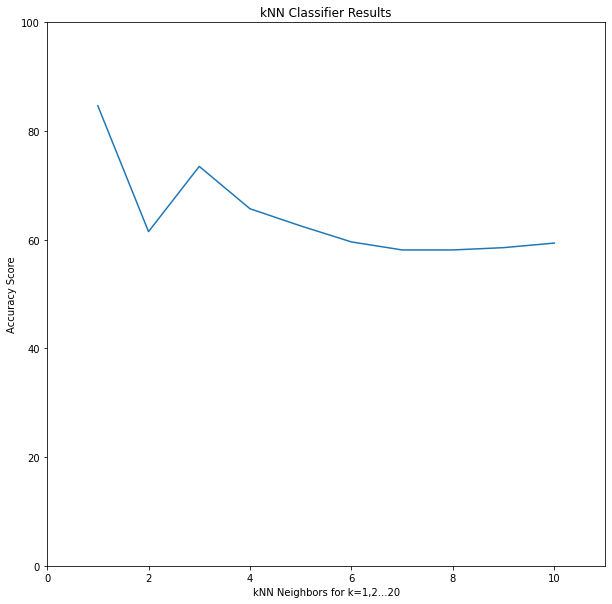

In [39]:
# KNeighborsClassifier with different neighbors value
result = []
train=[]
xlabel = [i for i in range(1, 11)]
for neighbors in range(1, 11):
    kNN = KNeighborsClassifier(n_neighbors=neighbors)
    kNN.fit(Train_X_Tfidf,Train_Y)
    prediction = kNN.predict(Test_X_Tfidf)
    result.append(accuracy_score(prediction, Test_Y)*100)
print(result)
plt.figure(figsize=(10, 10))
plt.xlabel('kNN Neighbors for k=1,2...20')
plt.ylabel('Accuracy Score')
plt.title('kNN Classifier Results')
plt.ylim(0, 100)
plt.xlim(0, xlabel[len(xlabel)-1]+1)
plt.plot(xlabel, result)
plt.savefig('1-fold 10NN Result.png')
plt.show()


# Neural Network

In [40]:
# create neural network model
def build_model():
    model = Sequential()
    model.add(Dense(512//2,input_dim=Train_X_Tfidf.shape[1], activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512//4, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(512//8, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [41]:
#called model with keras classifier
print("Compile model ...")
estimator = KerasClassifier(build_fn=build_model, epochs=30, batch_size=20)
estimator.fit(Train_X_Tfidf,Train_Y)


Compile model ...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               1280256   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 32)                2

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 256), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


214/214 [==============================] - 5s 19ms/step - loss: 1.5992 - accuracy: 0.2209
Epoch 2/30
214/214 [==============================] - 4s 19ms/step - loss: 1.3656 - accuracy: 0.4163
Epoch 3/30
214/214 [==============================] - 4s 19ms/step - loss: 0.9122 - accuracy: 0.6432
Epoch 4/30
214/214 [==============================] - 4s 19ms/step - loss: 0.5506 - accuracy: 0.8152
Epoch 5/30
214/214 [==============================] - 4s 19ms/step - loss: 0.3037 - accuracy: 0.9019
Epoch 6/30
214/214 [==============================] - 4s 19ms/step - loss: 0.2076 - accuracy: 0.9424
Epoch 7/30
214/214 [==============================] - 4s 19ms/step - loss: 0.1272 - accuracy: 0.9642
Epoch 8/30
214/214 [==============================] - 4s 19ms/step - loss: 0.1057 - accuracy: 0.9712
Epoch 9/30
214/214 [==============================] - 4s 19ms/step - loss: 0.0871 - accuracy: 0.9792
Epoch 10/30
214/214 [==============================] - 4s 19ms/step - loss: 0.0670 - accuracy: 0.9855


In [42]:
# predict test data with model
print ("Predict on test data ... ")
prediction = estimator.predict(Test_X_Tfidf)

Predict on test data ... 


In [43]:
# from matplotlib import pyplot as plt 
# history.history.keys() 
# plt.plot(history.history['loss']) 
# plt.title('model loss') 
# plt.ylabel('loss') 
# plt.xlabel('epoch') 
# plt.legend(['train', 'test'], loc='upper left') 
# plt.show() 

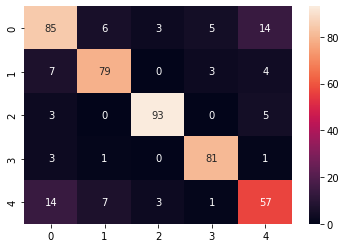

In [44]:
#show confusion matrix
cm=confusion_matrix(Test_Y,prediction)
sns.heatmap(cm,annot=True,fmt="d")

In [45]:
#show classification report
print(classification_report(Test_Y,prediction))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76       113
           1       0.85      0.85      0.85        93
           2       0.94      0.92      0.93       101
           3       0.90      0.94      0.92        86
           4       0.70      0.70      0.70        82

    accuracy                           0.83       475
   macro avg       0.83      0.83      0.83       475
weighted avg       0.83      0.83      0.83       475



In [46]:
score_nn=accuracy_score(prediction, Test_Y)*100

In [47]:
print(score_nn)

83.15789473684211


In [48]:
estimator_eval = evaluate_model(estimator, Test_X_Tfidf, Test_Y)

# Print result
print('Accuracy:', estimator_eval['acc'])
print('Precision:', estimator_eval['prec'])
print('Recall:', estimator_eval['rec'])
print('F1 Score:', estimator_eval['f1'])
print('Cohens Kappa Score:', estimator_eval['kappa'])
#print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', estimator_eval['cm'])

Accuracy: 0.8315789473684211
Precision: 0.8315789473684211
Recall: 0.8315789473684211
F1 Score: 0.8315789473684211
Cohens Kappa Score: 0.7888173214255942
Confusion Matrix:
 [[85  6  3  5 14]
 [ 7 79  0  3  4]
 [ 3  0 93  0  5]
 [ 3  1  0 81  1]
 [14  7  3  1 57]]


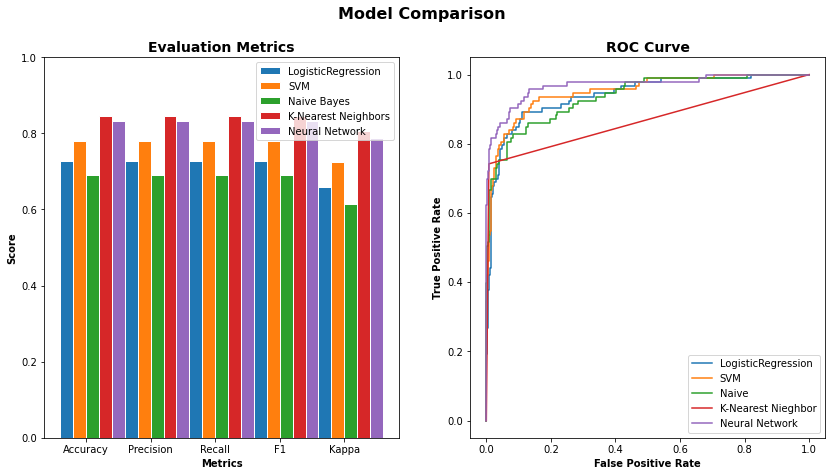

In [49]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
nn_score = [estimator_eval['acc'], estimator_eval['prec'], estimator_eval['rec'], estimator_eval['f1'], estimator_eval['kappa']]
rf_score = [lr_eval['acc'],lr_eval['prec'], lr_eval['rec'], lr_eval['f1'],lr_eval['kappa']]
nb_score = [Naive_eval['acc'], Naive_eval['prec'], Naive_eval['rec'], Naive_eval['f1'], Naive_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='LogisticRegression')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='SVM')
ax1.bar(r3, nb_score, width=barWidth, edgecolor='white', label='Naive Bayes')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')
ax1.bar(r5, nn_score, width=barWidth, edgecolor='white', label='Neural Network')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='LogisticRegression')
ax2.plot(lr_eval['fpr'],lr_eval['tpr'], label='SVM')
ax2.plot(Naive_eval['fpr'], Naive_eval['tpr'], label='Naive')
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor')
ax2.plot(estimator_eval['fpr'], estimator_eval['tpr'], label='Neural Network')

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

In [50]:
score_nn_t=estimator.score(Train_X_Tfidf,Train_Y)*100

214/214 [==============================] - 1s 3ms/step - loss: 0.0061 - accuracy: 0.9977


# model compare with Train and Test accuracy

In [51]:
scores = [score_knn_t,score_nn_t,score_svm_t,score_lr_t,score_nb_t]
algorithms = ["KNeighborsClassifier","Neural network","SVM","Logistic Regression","naive_bayes"]    

for i in range(len(algorithms)):
    print("The Traing accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The Traing accuracy score achieved using KNeighborsClassifier is: 99.90630124150856 %
The Traing accuracy score achieved using Neural network is: 99.76575374603271 %
The Traing accuracy score achieved using SVM is: 96.60342000468493 %
The Traing accuracy score achieved using Logistic Regression is: 89.48231435933474 %
The Traing accuracy score achieved using naive_bayes is: 84.84422581400797 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


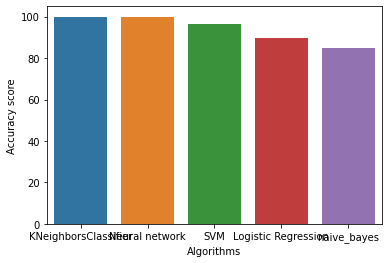

In [52]:
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)

In [53]:
scores = [score_knn,score_nn,score_svm,score_lr,score_nb]
algorithms = ["KNeighborsClassifier","Neural network","SVM","Logistic Regression","naive_bayes"]    

for i in range(len(algorithms)):
    print("The Testing accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The Testing accuracy score achieved using KNeighborsClassifier is: 84.63157894736842 %
The Testing accuracy score achieved using Neural network is: 83.15789473684211 %
The Testing accuracy score achieved using SVM is: 78.10526315789474 %
The Testing accuracy score achieved using Logistic Regression is: 72.84210526315789 %
The Testing accuracy score achieved using naive_bayes is: 69.05263157894737 %


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


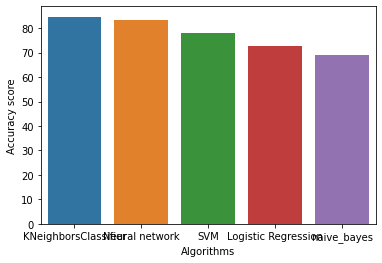

In [54]:
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")
sns.barplot(algorithms,scores)